In [16]:
import numpy as np

def sample_checkerboard_points(N, num_samples):
    # Define the range
    lower_bound = -4
    upper_bound = 4
    
    # Generate a list of coordinates of all checkerboard centers
    def is_valid_cube(coordinates):
        # A valid cube is one where the sum of coordinates modulo 2 is zero
        return sum(coordinates) % 2 == 0
    
    # Generate all possible cube center coordinates
    step_size = 2  # The side length of each cube
    cube_centers = []
    grid_points = np.arange(lower_bound + step_size / 2, upper_bound, step_size)
    
    for coords in np.ndindex(*(grid_points.size,) * N):
        coords = np.array([grid_points[c] for c in coords])
        if is_valid_cube(coords // step_size):
            cube_centers.append(coords)
    
    # Sample points
    sampled_points = []
    for _ in range(num_samples):
        # Randomly choose a valid cube center
        center = cube_centers[np.random.randint(len(cube_centers))]
        # Randomly sample a point within this cube
        point = center + np.random.uniform(-step_size / 2, step_size / 2, N)
        sampled_points.append(point)
    
    return np.array(sampled_points)


# Example usage
N = 3  # Dimensions
num_samples = 100000  # Number of points to sample
samples = sample_checkerboard_points(N, num_samples)
# print(samples)


In [7]:
samples.shape

(10000, 3)

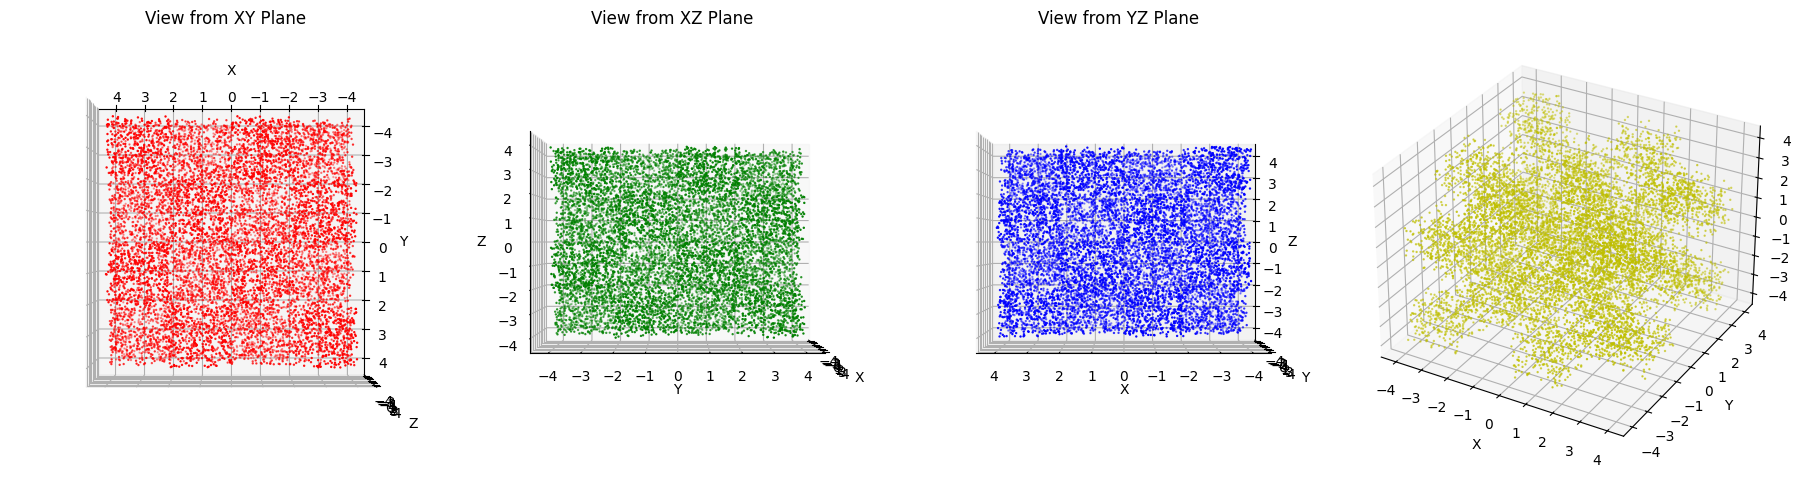

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming samples is already defined from the previous function
x = samples[:, 0]
y = samples[:, 1]
z = samples[:, 2]

# Create a figure
fig = plt.figure(figsize=(18, 6))

# Add subplots for each pair of axes
ax1 = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142, projection='3d')
ax3 = fig.add_subplot(143, projection='3d')
ax4 = fig.add_subplot(144, projection='3d')

# Plot the data on each subplot
ax1.scatter(x, y, z, c='r', marker='o', s=0.5)
ax2.scatter(x, y, z, c='g', marker='o', s=0.5)
ax3.scatter(x, y, z, c='b', marker='o', s=0.5)
ax4.scatter(x, y, z, c='y', marker='o', s=0.5)

# Set labels for the first subplot (view from XY plane)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(elev=90, azim=90)  # Top-down view to see XY plane

# Set labels for the second subplot (view from XZ plane)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=0, azim=0)  # Side view to see XZ plane

# Set labels for the third subplot (view from YZ plane)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.view_init(elev=0, azim=90)  # Side view to see YZ plane

# Set labels for the first subplot (view from XY plane)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

# Set titles for each subplot
ax1.set_title('View from XY Plane')
ax2.set_title('View from XZ Plane')
ax3.set_title('View from YZ Plane')

# Show the plot
plt.tight_layout()
plt.show()



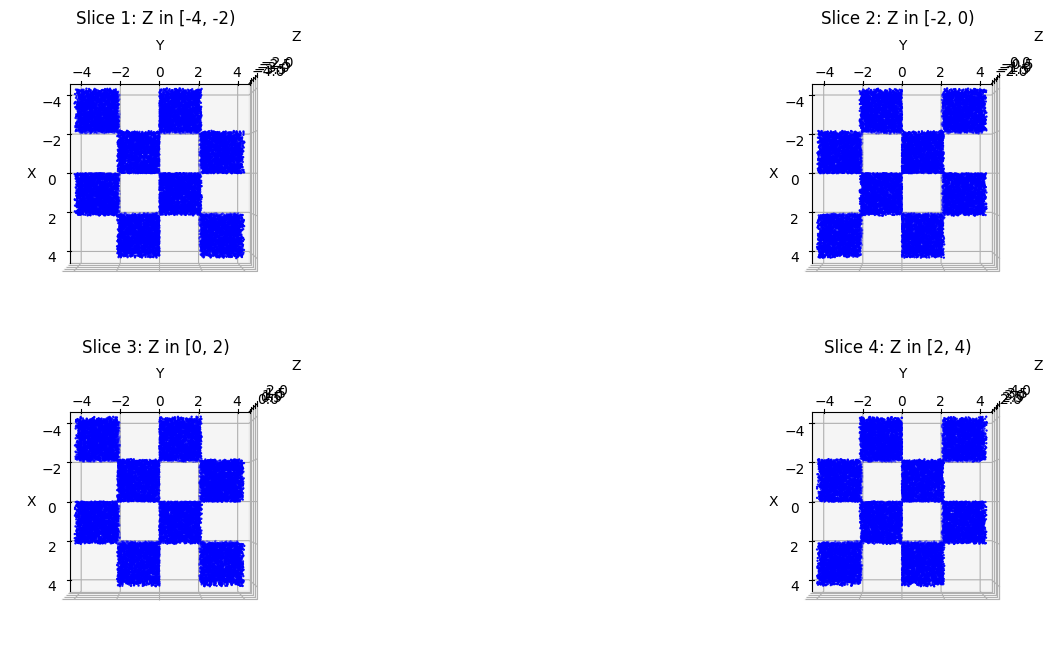

In [25]:
# Plotting slices of the 3D checkerboard where y belongs to specific ranges

# Define the ranges for y
y_ranges = [(-4, -2), (-2, 0), (0, 2), (2, 4)]

fig = plt.figure(figsize=(15, 10))

for i, (y_min, y_max) in enumerate(y_ranges):
    # Filter points within the y range
    mask = (samples[:, 2] >= y_min) & (samples[:, 2] < y_max)
    x_slice = samples[mask][:, 0]
    y_slice = samples[mask][:, 1]
    z_slice = samples[mask][:, 2]

    # Create a subplot for each slice
    ax = fig.add_subplot(3, 2, i + 1, projection='3d')
    ax.scatter(x_slice, y_slice, z_slice, c='b', marker='o', s=0.5)
    
    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=90, azim=0)
    
    # Set title for each subplot
    ax.set_title(f'Slice {i+1}: Z in [{y_min}, {y_max})')

plt.tight_layout()
plt.show()


In [54]:
a, b,c = x.shape

In [56]:
b

50

In [61]:
import torch

# Example tensor
seq_len, batch_size, feature = 100, 4, 100  # Example sizes, adjust as needed
x = torch.randint(0, 10, (seq_len, batch_size, feature))
space_dim = 4
# print(x)
# print("\n")

# Reshape the tensor
x_reshaped = x.view(seq_len, batch_size, space_dim, feature // space_dim)
# print(x_reshaped)
# print("\n")
# Check the property
valid = True
token_dim = feature // space_dim
for i in range(seq_len):
    for j in range(space_dim):
        if not torch.equal(x[i, :, j*token_dim:(j+1)*token_dim], x_reshaped[i, :, j, :]):
            print("HERE")
            print(x[i, :, j*token_dim:(j+1)*token_dim])
            print(x_reshaped[i, :, j, :])
            print("\n")
            # print(f"Mismatch at x[{i}, :, :feature // 2]")
            valid = False

x_reshaped = x_reshaped.permute(0, 2, 1, 3).contiguous()
x_reshaped = x_reshaped.view(seq_len * space_dim, batch_size, feature // space_dim)

# Check the property
valid = True
for i in range(seq_len):
    for j in range(space_dim):
        if not torch.equal(x[i, :, j*token_dim:(j+1)*token_dim], x_reshaped[(i * (space_dim))+j, :, :]):
            # print(f"Mismatch at x[{i}, :, :feature // 2]")
            print(x[i, :, j*token_dim:(j+1)*token_dim])
            print(x_reshaped[(i * (space_dim))+j, :, :])
            print("\n")
            valid = False

# if valid:
#     print("All checks passed.")
# else:
#     print("Some checks failed.")

# print(x_reshaped.shape)  # Should print torch.Size([seq_len * 2, batch_size, feature // 2])
